## Exploratoray Data Analysis

###### Major League Baseball data set and analysed the salary of the playes for the number of years they played and number of games they played.

All the required Libraries are are imported of the data analysis and for the visualization.

In [1]:
import math
import statistics
import numpy as np
import scipy as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import scipy.integrate
from scipy.stats import ttest_ind

### Loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\Lathapriya\Documents\BNM864J-Software Analytics\mlb.csv")
df.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


##### To see the available colunms in the dataset

In [3]:
print(df.columns)

Index(['salary', 'player_position', 'race', 'team_payroll', 'years_played',
       'games_played', 'career_at_bats', 'career_runs', 'career_hits',
       'career_doubles', 'career_triples', 'career_homeruns',
       'career_runs_batted_in', 'career_batting_average', 'career_walks',
       'career_strike_outs', 'career_stolen_bases', 'career_fielding_percent',
       'white_percent_in_city', 'black_percent_in_city',
       'hispanic_percent_in_city'],
      dtype='object')


##### To see the shape of the dataset can be viewed which includes the label row and columns.

In [4]:
df.shape

(352, 21)

##### To Know more about the data, the descriptive analysis are performed on the data, for this we exclude the categorical variable and performing only on the numerical variables.

In [5]:
df.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
mean,1.331514e+06,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,16.590909,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,21.395948,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,3.000000,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,9.000000,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,23.000000,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650
max,6.200000e+06,4.286600e+07,20.000000,2729.000000,10554.000000,1570.000000,3025.000000,634.000000,142.000000,432.000000,1710.000000,625.000000,1286.000000,1891.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


##### Checking for any missing values in the data that can be cleaned.

In [6]:
df.isnull().sum()

salary                       0
player_position              0
race                         0
team_payroll                 0
years_played                 0
games_played                 0
career_at_bats               0
career_runs                  0
career_hits                  0
career_doubles               0
career_triples               0
career_homeruns              0
career_runs_batted_in        0
career_batting_average       0
career_walks                 0
career_strike_outs           0
career_stolen_bases          0
career_fielding_percent      0
white_percent_in_city       23
black_percent_in_city       23
hispanic_percent_in_city    23
dtype: int64

##### From the above output we there on few missing values on the last three columns which need to be removed for the further analysis
##### And checking the data for any more missing values.

In [7]:
df1=df.fillna(0)
df1.head(20)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.87780
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.87780
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.87780
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.87780
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.87780
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,...,37,141,234,77,358,67,965,70.27797,18.84423,10.87780
6,275000,catcher,white,38407380,10,432,1005,78,240,35,...,13,95,239,39,140,1,990,70.27797,18.84423,10.87780
7,235000,shortstop,hispanic,38407380,4,223,491,37,118,16,...,1,29,240,23,62,6,963,70.27797,18.84423,10.87780
8,212500,outfield,black,38407380,3,156,434,45,116,16,...,10,59,267,18,48,6,971,70.27797,18.84423,10.87780
9,212500,catcher,white,38407380,2,169,447,41,111,18,...,14,44,248,47,109,3,993,70.27797,18.84423,10.87780


In [8]:
df1.isnull().sum()

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

###### From the cell we could see the data cell in clean and can be used for further Analysis

In [9]:
df1.shape

(352, 21)

In [10]:
df1.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1.331514e+06,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,16.590909,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,67.891991,15.461084,10.112834
std,1.383952e+06,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,21.395948,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,23.248027,13.851258,9.475213
min,1.090000e+05,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000
25%,2.527000e+05,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,3.000000,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,60.975630,7.986870,1.922861
50%,6.750000e+05,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,9.000000,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,73.149640,13.871620,5.743671
75%,2.250000e+06,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,23.000000,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650
max,6.200000e+06,4.286600e+07,20.000000,2729.000000,10554.000000,1570.000000,3025.000000,634.000000,142.000000,432.000000,1710.000000,625.000000,1286.000000,1891.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


In [11]:
##checking number of unique values for the cleaned dataset
df1.nunique()

salary                      212
player_position               6
race                          3
team_payroll                 28
years_played                 19
games_played                307
career_at_bats              344
career_runs                 264
career_hits                 304
career_doubles              191
career_triples               64
career_homeruns             139
career_runs_batted_in       264
career_batting_average      113
career_walks                240
career_strike_outs          273
career_stolen_bases         130
career_fielding_percent      61
white_percent_in_city        23
black_percent_in_city        23
hispanic_percent_in_city     23
dtype: int64

In [12]:
#removing the columns that are not required for the analysis.
df2 = df1.drop(['white_percent_in_city','black_percent_in_city','hispanic_percent_in_city'], axis=1)

In [13]:
print (df2.columns)

Index(['salary', 'player_position', 'race', 'team_payroll', 'years_played',
       'games_played', 'career_at_bats', 'career_runs', 'career_hits',
       'career_doubles', 'career_triples', 'career_homeruns',
       'career_runs_batted_in', 'career_batting_average', 'career_walks',
       'career_strike_outs', 'career_stolen_bases', 'career_fielding_percent'],
      dtype='object')


In [14]:
pd.set_option('display.max_rows',df2.shape[0]+1)

In [15]:
df2

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,13,37,141,234,77,358,67,965
6,275000,catcher,white,38407380,10,432,1005,78,240,35,5,13,95,239,39,140,1,990
7,235000,shortstop,hispanic,38407380,4,223,491,37,118,16,5,1,29,240,23,62,6,963
8,212500,outfield,black,38407380,3,156,434,45,116,16,0,10,59,267,18,48,6,971
9,212500,catcher,white,38407380,2,169,447,41,111,18,1,14,44,248,47,109,3,993


In [16]:
pd.set_option('display.max_rows',10)

In [17]:
df2

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,312000,shortstop,white,35586456,5,439,1098,150,260,41,8,6,83,237,136,138,43,964
348,275000,catcher,hispanic,35586456,2,211,700,63,183,32,1,11,64,261,29,115,0,983
349,250000,thirdbase,white,35586456,3,249,828,112,176,36,2,41,110,213,94,264,10,941
350,200000,secondbase,white,35586456,6,667,2087,217,510,92,5,13,168,244,137,239,20,987


In [18]:
df2.dtypes

salary                      int64
player_position            object
race                       object
team_payroll                int64
years_played                int64
                            ...  
career_batting_average      int64
career_walks                int64
career_strike_outs          int64
career_stolen_bases         int64
career_fielding_percent     int64
Length: 18, dtype: object

In [19]:
df2.select_dtypes(include=['number'])

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
0,3375000,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968
1,3100000,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994
2,2900000,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971
3,1650000,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977
4,700000,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,312000,35586456,5,439,1098,150,260,41,8,6,83,237,136,138,43,964
348,275000,35586456,2,211,700,63,183,32,1,11,64,261,29,115,0,983
349,250000,35586456,3,249,828,112,176,36,2,41,110,213,94,264,10,941
350,200000,35586456,6,667,2087,217,510,92,5,13,168,244,137,239,20,987


In [20]:
df2.select_dtypes(include=['object'])

,player_position,race
0,shortstop,black
1,firstbase,white
2,thirdbase,white
3,outfield,black
4,outfield,black
...,...,...
347,shortstop,white
348,catcher,hispanic
349,thirdbase,white
350,secondbase,white


##### Descriptive analysis on the salary of the players

In [21]:
df2.salary.max()

6200000

In [22]:
df2.salary.min()

109000

In [23]:
df2.salary.mean()

1331514.4630681819

##### Descriptive Analysis to know about the years played by the players in the major league

In [24]:
df2.years_played.max()

20

In [25]:
df2.years_played.min()

1

In [26]:
df2.years_played.mean()

6.309659090909091

##### Descriptive Analysis to know about more about the games played over the years

In [27]:
df2.games_played.min()

7

In [28]:
df2.games_played.max()

2729

In [29]:
df2.games_played.mean()

645.4232954545455

In [30]:
highest_games_played_information=df2[df2.games_played == df2.games_played.max()]

In [31]:
highest_games_played_information

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
222,2700000,outfield,white,22840832,19,2729,10554,1570,3025,558,123,243,1355,287,922,1257,262,971


##### The data of the player who was highest paid in MLB

In [32]:
df2[df2.salary == df2.salary.max()]

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
32,6200000,outfield,black,38553668,7,1046,3732,572,1040,224,37,135,596,279,463,570,32,958


##### players played games more than 100 stolen bases

In [33]:
df2.career_stolen_bases.mean()

65.0965909090909

In [34]:
stolen_bases=df2[df2.career_stolen_bases>64]

In [35]:
stolen_bases.career_stolen_bases.count()

98

##### Analyis to know more about Home Runs of the players

In [36]:
df2[df2.career_homeruns ==df2.career_homeruns.min()]

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
20,125000,outfield,white,18297546,2,37,111,13,28,7,2,0,11,252,10,28,0,992
21,123000,outfield,black,18297546,1,32,99,14,29,6,0,0,7,293,11,13,0,967
22,123000,outfield,black,18297546,3,38,77,9,16,3,0,0,4,208,9,10,12,1000
65,120000,shortstop,hispanic,22987668,3,38,67,7,16,1,2,0,5,239,1,19,0,969
66,112000,thirdbase,white,22987668,2,92,229,26,58,13,0,0,11,253,19,39,6,961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,115000,shortstop,white,42866000,2,26,34,3,6,1,2,0,3,176,0,10,0,980
276,110000,firstbase,white,27705332,1,7,14,1,2,1,0,0,2,143,5,5,0,1000
290,285000,secondbase,black,35228168,5,308,710,104,175,20,6,0,43,246,77,69,45,962
298,1090000,outfield,white,39776560,2,55,58,4,11,4,0,0,6,190,5,16,0,875


In [37]:
df2[df2.career_homeruns ==df2.career_homeruns.max()]

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
308,2700000,outfield,black,27396932,19,2707,10047,1551,2866,493,83,432,1710,285,1126,1503,218,982


In [38]:
df2.career_homeruns.mean()

54.53125

In [39]:
home_runs= df2[df2.career_homeruns>56]

In [40]:
home_runs.career_homeruns.count()

106

##### Analysing the players position with the years and games played and also the income earned.

In [41]:
df2.player_position.unique()

array(['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher',
       'secondbase'], dtype=object)

In [42]:
 df2.groupby('player_position').years_played.describe()

,count,mean,std,min,25%,50%,75%,max
player_position,,,,,,,,
catcher,52.0,5.826923,3.323836,1.0,3.0,5.5,8.25,13.0
firstbase,45.0,6.200000,4.403511,1.0,3.0,5.0,8.00,20.0
outfield,136.0,6.536765,4.071415,1.0,3.0,6.0,9.00,19.0
secondbase,36.0,6.250000,3.636128,1.0,3.0,5.5,8.25,16.0
shortstop,49.0,6.326531,4.089559,1.0,3.0,6.0,9.00,17.0
thirdbase,34.0,6.323529,3.149994,1.0,4.0,6.0,8.75,13.0


In [43]:
 df2.groupby('player_position').games_played.describe()

,count,mean,std,min,25%,50%,75%,max
player_position,,,,,,,,
catcher,52.0,426.211538,349.387494,11.0,163.00,335.0,645.25,1624.0
firstbase,45.0,702.511111,617.103337,7.0,221.00,554.0,972.00,2562.0
outfield,136.0,706.044118,574.653672,12.0,275.50,580.5,1002.50,2729.0
secondbase,36.0,677.500000,485.196897,47.0,302.25,551.5,978.50,2095.0
shortstop,49.0,632.918367,560.498544,21.0,159.00,517.0,952.00,2208.0
thirdbase,34.0,646.705882,459.173865,10.0,304.25,546.0,857.00,1767.0


In [44]:
 df2.groupby('player_position').salary.describe()

,count,mean,std,min,25%,50%,75%,max
player_position,,,,,,,,
catcher,52.0,8.925192e+05,9.561904e+05,112500.0,182250.0,412500.0,1181250.0,3400000.0
firstbase,45.0,1.586781e+06,1.578339e+06,109000.0,287500.0,655000.0,3100000.0,4750000.0
outfield,136.0,1.539324e+06,1.515359e+06,109000.0,307500.0,905000.0,2700000.0,6200000.0
secondbase,36.0,1.170208e+06,1.143849e+06,112500.0,263750.0,718750.0,1787500.0,4833333.0
shortstop,49.0,1.069211e+06,1.340428e+06,115000.0,235000.0,400000.0,1112500.0,5700000.0
thirdbase,34.0,1.382647e+06,1.240422e+06,109000.0,425000.0,675000.0,2550000.0,4333333.0


##### Visualising data based on the players position with years played

In [45]:
pws = df2[['player_position','salary']]

player_position = ['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher','secondbase']
pws = pws[ pws['player_position'].isin(player_position)]
pws

,player_position,salary
0,shortstop,3375000
1,firstbase,3100000
2,thirdbase,2900000
3,outfield,1650000
4,outfield,700000
...,...,...
347,shortstop,312000
348,catcher,275000
349,thirdbase,250000
350,secondbase,200000


array([<AxesSubplot:title={'center':'catcher'}>,
       <AxesSubplot:title={'center':'firstbase'}>,
       <AxesSubplot:title={'center':'outfield'}>,
       <AxesSubplot:title={'center':'secondbase'}>,
       <AxesSubplot:title={'center':'shortstop'}>,
       <AxesSubplot:title={'center':'thirdbase'}>], dtype=object)

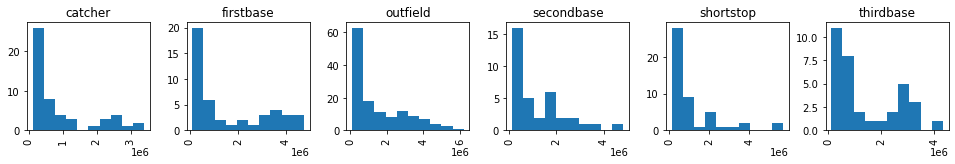

In [46]:
pws['salary'].hist(by=pws['player_position'],layout=(1,6), figsize=(16,2))

In [47]:
table = pd.pivot_table(df1,index=['player_position'],values=['salary'], aggfunc=np.mean)
table

,salary
player_position,
catcher,8.925192e+05
firstbase,1.586781e+06
outfield,1.539324e+06
secondbase,1.170208e+06
shortstop,1.069211e+06
thirdbase,1.382647e+06


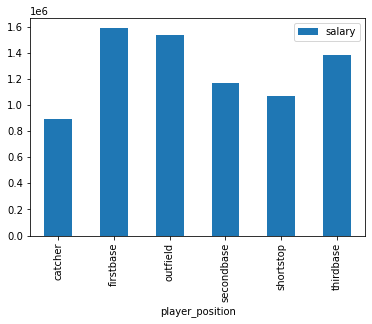

In [48]:
table.plot(kind='bar');

##### The Graphical Vizualization of players position in the pie chart is shown.

<AxesSubplot:ylabel='player_position'>

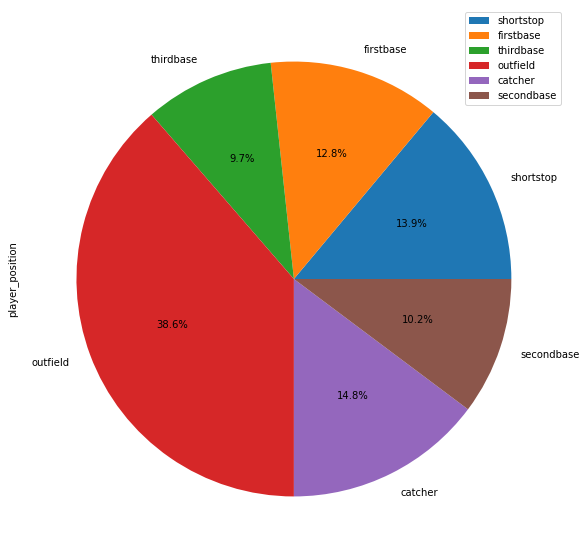

In [49]:
type_counts = df2['player_position'].value_counts()
vis = pd.DataFrame({'player_position': type_counts}, 
                     index = ['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher','secondbase'])
vis.plot.pie(y='player_position', figsize=(10,10), autopct='%1.1f%%')

##### The graphical vizualization on number of players for years  played is represented in bar chart.

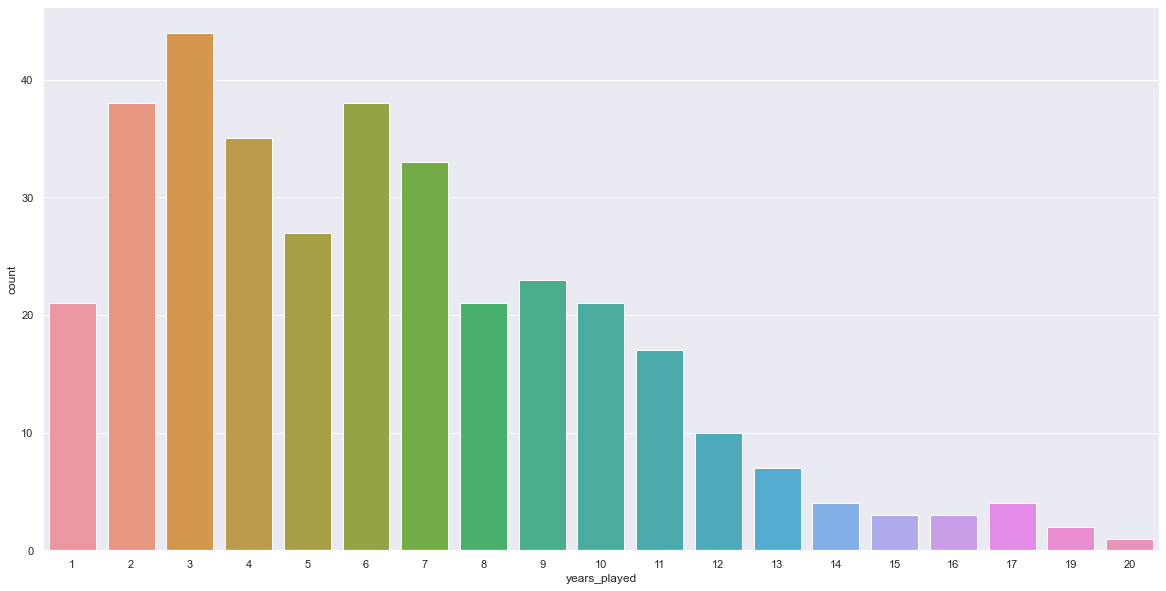

In [50]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='years_played', data=df2)

###### The correlation matrix between the data and presented as heatmap

In [51]:
corr=df2.corr()

In [52]:
corr

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent
salary,1.000000,0.220123,0.473349,0.584546,0.611377,0.643348,0.619335,0.622921,0.468960,0.604904,0.644419,0.279291,0.581829,0.538225,0.362984,0.066248
team_payroll,0.220123,1.000000,0.174519,0.172700,0.168567,0.208775,0.167737,0.156786,0.156106,0.134528,0.156838,0.081330,0.149743,0.164550,0.121119,-0.042996
years_played,0.473349,0.174519,1.000000,0.941154,0.899723,0.839877,0.882268,0.840570,0.741593,0.671924,0.821112,0.194804,0.813086,0.763459,0.556820,0.109930
games_played,0.584546,0.172700,0.941154,1.000000,0.988525,0.937213,0.977303,0.937346,0.822149,0.768165,0.923399,0.264715,0.905553,0.832479,0.608380,0.091794
career_at_bats,0.611377,0.168567,0.899723,0.988525,1.000000,0.955979,0.994441,0.957113,0.841857,0.789660,0.943223,0.284668,0.909050,0.833115,0.626594,0.076934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
career_batting_average,0.279291,0.081330,0.194804,0.264715,0.284668,0.307602,0.318535,0.311524,0.268499,0.195461,0.276055,1.000000,0.272640,0.175078,0.209081,-0.126510
career_walks,0.581829,0.149743,0.813086,0.905553,0.909050,0.907716,0.909560,0.882573,0.724018,0.780489,0.879506,0.272640,1.000000,0.776748,0.616631,0.086515
career_strike_outs,0.538225,0.164550,0.763459,0.832479,0.833115,0.782044,0.805973,0.783596,0.650191,0.833286,0.851210,0.175078,0.776748,1.000000,0.510023,0.040061
career_stolen_bases,0.362984,0.121119,0.556820,0.608380,0.626594,0.698237,0.631485,0.547216,0.747898,0.321691,0.460823,0.209081,0.616631,0.510023,1.000000,0.053337


<AxesSubplot:>

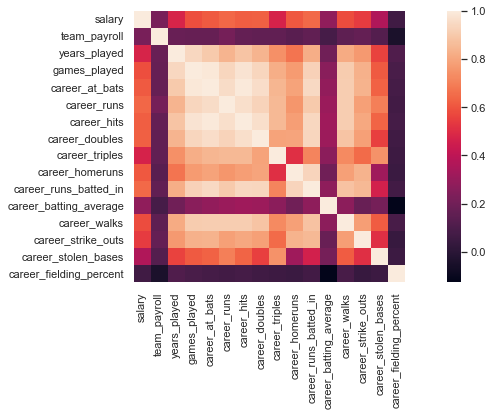

In [53]:

fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, square=True)

### Findings from the Analysis
######   -The highest salary paid  was $6200000 who had played 1046 games for 7 years.
###### -The highest number of games played by the player was 2729 games and the average games played by a player was 645 games.
###### -The average home runs of the player is 54 ans there are 106 players whose home rus are is higher than the average.
###### -Most of the players played in outfield position.
###### -The player in firstbase positions earned more compare to the other position players.
###### -from the correlation matrix the team payroll does not related much to the other data.
###### -From these analysis we could find that the salary earned by the players does not depend much on the years and the games they played.
